In [1]:
import requests
from requests.auth import HTTPBasicAuth
import json

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

settings format:
    { "website1": {
        "username": "<>",
        "password"" "<>" }, 
      "website2": {
        "username": "<>",
        "password"" "<>" }
    }

In [259]:
nfl_stats = ['GamesPlayed','PassAttempts','PassCompletions','PassPct','PassYards','PassAvg','PassYardsPerAtt','PassTD',
    'PassTDPct','PassInt','PassIntPct','PassAttempts','PassTD','PassTDPct','PassInt','PassIntPct','PassLng',
    'Pass20Plus','Pass40Plus','PassSacks','PassSackY','QBRating','RushAttempts','RushYards','RushAverage',
    'RushTD','RushLng','Rush20Plus','Rush40Plus','RushFumbles','Targets','Receptions','RecYards','RecAverage',
    'RecTD','RecLng','Rec20Plus','Rec40Plus','RecFumbles','TackleSolo','TackleTotal','TackleAst','Sacks',
    'SackYds','Safeties','TacklesForLoss','Interceptions','IntTD','IntYds','IntAverage','IntLng','PassesDefended',
    'Stuffs','StuffYds','KB','Fumbles','FumLost','FumForced','FumOwnRec','FumOppRec','FumRecYds','FumTotalRec',
    'FumTD','KrRet','KrYds','KrAvg','KrLng','KrTD','Kr20Plus','Kr40Plus','KrFC','KrFum','PrRet','PrYds','PrAvg',
    'PrLng','PrTD','Pr20Plus','Pr40Plus','PrFC','PrFum','PrFC','PrFum','TwoPtAtt',
    'TwoPtMade','TwoPtPassAtt','TwoPtPassMade','TwoPtPassRec','TwoPtRushAtt','TwoPtRushMade']

def request_str(version = 'v1.1', 
                league = 'nfl',
                season = '2016-2017', 
                reg_poff = 'regular', 
                api = 'cumulative_player_stats',
               additional = None):
    
    if additional is None:
        requestStr = 'https://api.mysportsfeeds.com/{0}/pull/{1}/{2}-{3}/{4}.json'.format(version, league, season, reg_poff, api)
    else:
        requestStr = 'https://api.mysportsfeeds.com/{0}/pull/{1}/{2}-{3}/{4}.json?playerstats={5}'.format(version, league, season, reg_poff, api, additional)
    return requestStr

def send_request(authentication = None, season = '2016-2017'):
    if authentication is None:
        try:
            settings = json.load(open('../APIsettings/config.json'))
            userid = str(settings['MySportsFeeds']['userid'])
            password = str(settings['MySportsFeeds']['password'])
        except:
            print ('!Error: Could not find config.json file. Make sure file exists or use authentication parameter')
            return
    else:
        try:
            userid = authentication['userid']
            password = authentication['password']
        except KeyError:
            print ('!Error: Authentication parameter was passed wrongly')
            return

    requestStr = request_str(season=season)
    #print (requestStr, userid, password)
    stats = requests.get(requestStr, auth=HTTPBasicAuth(userid, password))
    status = stats.status_code
    
    if status != 200:
        print ('!Error: {} status code'.format(status))
        return
    
    return stats.json()

def players_stats(season = '2016-2017', nfl_stats = nfl_stats):
    pstats_json = send_request(season=season)
    players = []
    ncolumns = ['FirstName','LastName','Position','TeamName', 'Team'] + nfl_stats
    for player in pstats_json['cumulativeplayerstats']['playerstatsentry']:
        player_stats = []
        for stat in nfl_stats:
            try:
                player_stats.append(float(player['stats'][stat]['#text']))
            except:
                player_stats.append('0')
        players_info = [player['player']['FirstName'], player['player']['LastName'], player['player']['Position'],player['team']['Name'], player['team']['Abbreviation']]
        players_info = players_info + player_stats
        players.append(players_info)
    
    return pd.DataFrame(players, columns = ncolumns)
#return players_df

In [260]:
stats = players_stats()
stats.head(10)

,FirstName,LastName,Position,TeamName,Team,GamesPlayed,PassAttempts,PassCompletions,PassPct,PassYards,...,PrFum,PrFC,PrFum,TwoPtAtt,TwoPtMade,TwoPtPassAtt,TwoPtPassMade,TwoPtPassRec,TwoPtRushAtt,TwoPtRushMade
0,Jared,Abbrederis,WR,Packers,GB,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mehdi,Abdesmad,DE,Titans,TEN,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ameer,Abdullah,RB,Lions,DET,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Isa,Abdul-Quddus,DB,Dolphins,MIA,15.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Oday,Aboushi,G,Texans,HOU,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Sam,Acho,OLB,Bears,CHI,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Kenneth,Acker,CB,Chiefs,KC,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Andrew,Adams,DB,Giants,NYG,13.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Davante,Adams,WR,Packers,GB,16.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,Jerell,Adams,TE,Giants,NYG,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
class NFLStat(object):
    
    """
    WORK-IN-PROGESS
    Retrieve NFLStats. A few changes are needed:
        - change api call to only call metric, to sort, and to limit
        https://www.mysportsfeeds.com/data-feeds/api-docs/#
    """
    
    def __init__(self, statname = 'PassPct', authentication = None):
        """
        authentication format: 
         {
         "userid": "",
         "password: ""
         }
        """
        
        self.name = statname
        self.data = None
        if authentication is None:
            try:
                settings = json.load(open('../APIsettings/config.json'))
                self.userid = str(settings['MySportsFeeds']['userid'])
                self.password = str(settings['MySportsFeeds']['password'])
            except:
                print ('!Error: Could not find config.json file. Make sure file exists or use authentication parameter')
                return
        else:
            try:
                self.userid = authentication['userid']
                self.password = authentication['password']
            except KeyError:
                print ('!Error: Authentication parameter was passed wrongly')
                return
    
    def get_data(self, season = '2016-2017', reg_poff = 'regular', top = 5):
        requestStr = request_str(season=season, reg_poff = reg_poff)
        print (requestStr)
        stats = requests.get(requestStr, auth=HTTPBasicAuth(userid, password))
        status = stats.status_code

        if status != 200:
            print ('!Error: {} status code'.format(status))
            return
    
        pstats_json = stats.json()
        players = []
        ncolumns = ['FirstName','LastName','Position','TeamName', 'Team'] + [self.name]
        for player in pstats_json['cumulativeplayerstats']['playerstatsentry']:
            player_stats = []
            try:
                player_stats.append(float(player['stats'][self.name]['#text']))
            except:
                player_stats.append(0.0)
            players_info = [player['player']['FirstName'], player['player']['LastName'], player['player']['Position'],player['team']['Name'], player['team']['Abbreviation']]
            players_info = players_info + player_stats
            players.append(players_info)
            
        players_df = pd.DataFrame(players, columns = ncolumns).sort_values(self.name, ascending=False).head(top)
        
        self.data = players_df
        return True
    
    def bplot(self, top=10):
        plt.figure(figsize=(16,4))
        if self.data is None:
            self.data = self.get_data(top = top)
        sns.barplot(self.data[self.name], self.data['FirstName']+self.data['LastName'], palette = 'Oranges')
        

https://api.mysportsfeeds.com/v1.1/pull/nfl/2016-2017-regular/cumulative_player_stats.json


/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


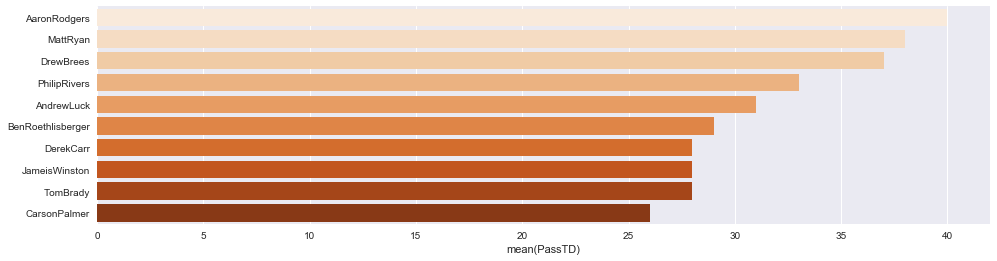

In [265]:
passTD = NFLStat('PassTD')
passTD.get_data(top=10)
passTD.bplot()

https://api.mysportsfeeds.com/v1.1/pull/nfl/2016-2017-regular/cumulative_player_stats.json


/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


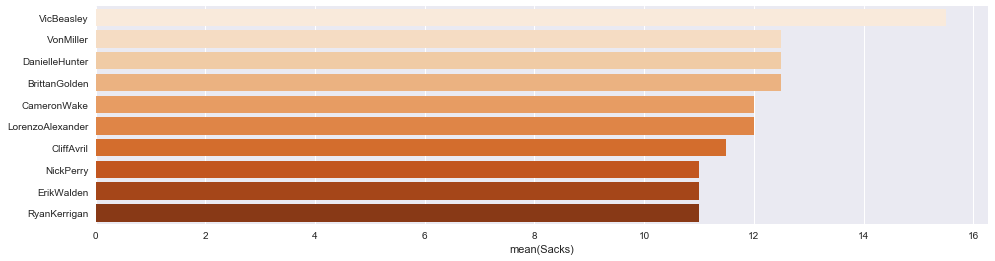

In [266]:
Sacks = NFLStat('Sacks')
Sacks.get_data(top=10)
Sacks.bplot()

https://api.mysportsfeeds.com/v1.1/pull/nfl/2016-2017-regular/cumulative_player_stats.json


/Users/calestini/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


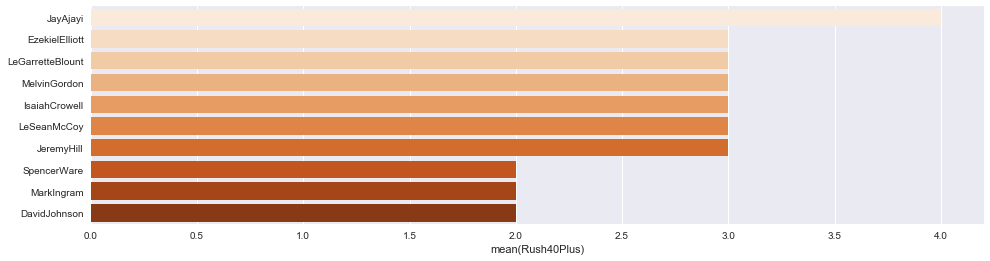

In [267]:
rush40 = NFLStat('Rush40Plus')
rush40.get_data(top=10)
rush40.bplot()